In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [2]:
import os, sys
home = os.environ['HOME']
git_dir = os.path.join(home, 'git')
sys.path.append(git_dir)  # find tommy lib
import tlib.plot as tpl
import tlib.notebook as tnb
tpl.test()

Tommaso library works!


In [3]:
df = pd.read_csv('BlackFriday.csv')
df = df.drop(['User_ID', 'Product_ID'], axis=1)
ys = df['Purchase'].values
# df = df.drop(['Purchase'], axis=1)

Is target distribution regular

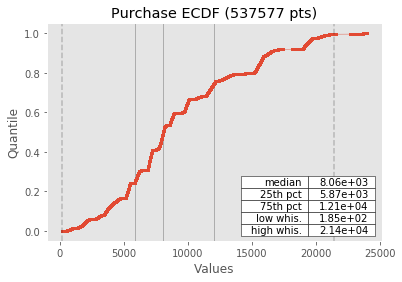

In [4]:
tpl.ECDF(ys, title='Purchase ECDF');

Where are missing values?

In [58]:
'Missing vals in product category 2: {:.0f}% in product category 3: {:.0f}%'.format(
    np.sum(100*df.Product_Category_2.isna())/len(df.Product_Category_2),
    np.sum(100*df.Product_Category_3.isna())/len(df.Product_Category_3)
)

'Missing vals in product category 2: 31% in product category 3: 69%'

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 41.0+ MB


Missing data in Product Category 2 and 3

Find simple signals between features and target

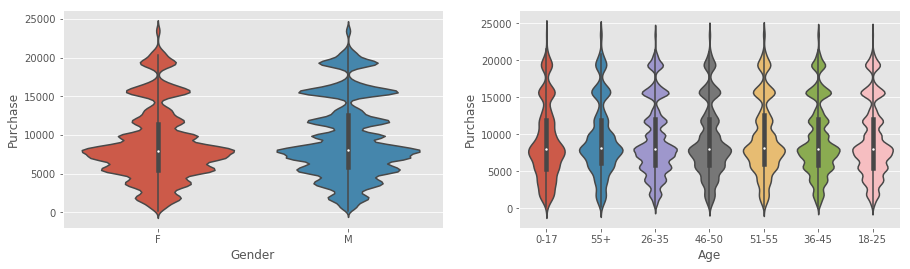

In [11]:
# keys = df.keys()
keys = ['Gender', 'Age']
fig, axs = plt.subplots(ncols=len(keys), figsize=(15, 4))
assert len(axs.flatten()) == len(keys)
for ax, key in zip(axs.flatten(), keys):
    sns.violinplot(data=df, y='Purchase', x=key, ax=ax, sharey=True);
#     sns.boxplot(data=df, y='Purchase', x=key, ax=ax);

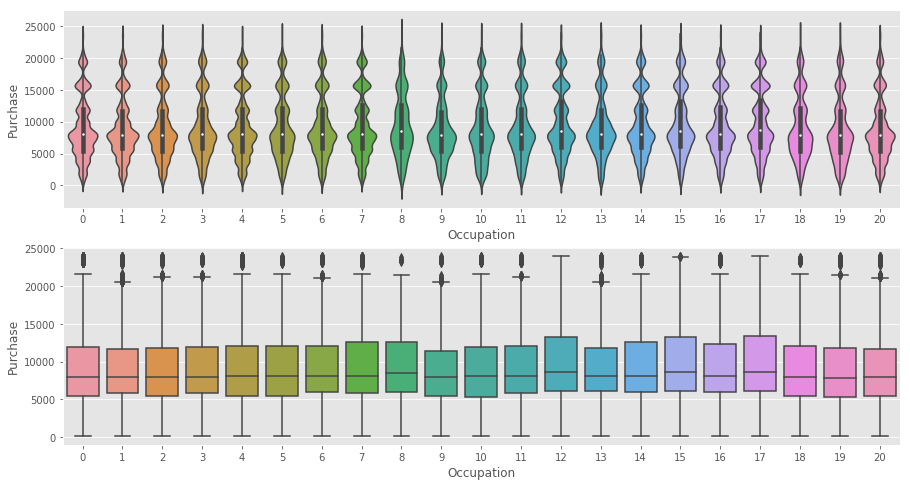

In [18]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(15,8))
sns.violinplot(data=df, y='Purchase', x='Occupation', ax=axs[0]);
sns.boxplot(data=df, y='Purchase', x='Occupation', ax=axs[1]);

- Target distribution seems to have tri-modal shape.
- Few outliers with high purchase

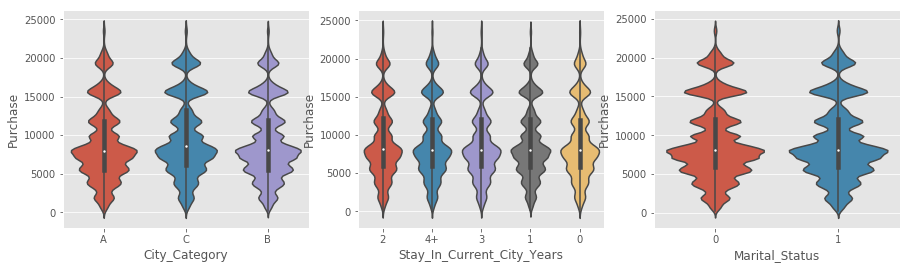

In [22]:
# keys = df.keys()
keys = ['City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
fig, axs = plt.subplots(ncols=len(keys), figsize=(15, 4))
assert len(axs.flatten()) == len(keys)
for ax, key in zip(axs.flatten(), keys):
    sns.violinplot(data=df, y='Purchase', x=key, ax=ax, sharey=True);
#     sns.boxplot(data=df, y='Purchase', x=key, ax=ax);

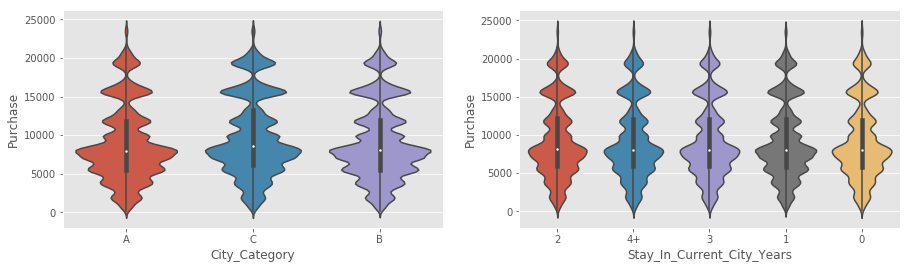

In [20]:
# keys = df.keys()
keys = ['City_Category', 'Stay_In_Current_City_Years']
fig, axs = plt.subplots(ncols=len(keys), figsize=(15, 4))
assert len(axs.flatten()) == len(keys)
for ax, key in zip(axs.flatten(), keys):
    sns.violinplot(data=df, y='Purchase', x=key, ax=ax, sharey=True);
#     sns.boxplot(data=df, y='Purchase', x=key, ax=ax);

In [30]:
df['Product_Category_1'].nunique(), df['Product_Category_2'].nunique(), df['Product_Category_3'].nunique()

(18, 17, 15)

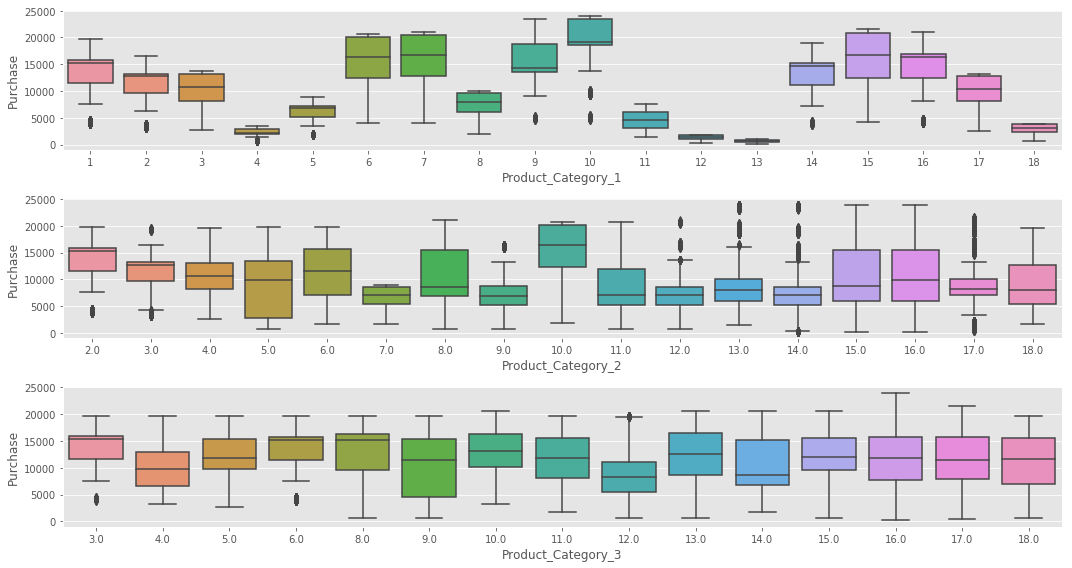

In [38]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(15,8))
# sns.violinplot(data=df, y='Purchase', x='Product_Category_1', ax=axs[0]);
sns.boxplot(data=df, y='Purchase', x='Product_Category_1', ax=axs[0]);
sns.boxplot(data=df, y='Purchase', x='Product_Category_2', ax=axs[1]);
sns.boxplot(data=df, y='Purchase', x='Product_Category_3', ax=axs[2]);
fig.tight_layout()

In [36]:
df.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


- Target distribution (and related marginals) approximately tri-modal.
- `Product_Category_1` feature that best explain target.
- A few outliers with high target.
- Single features do not explain target variation much.
- Missing data increasing in product category. Maybe they haven't bought?